In [2]:
!pip install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

In [2]:
img_cv = cv2.imread('053.jpeg')

cv2.imshow('Business card', img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/user/Downloads/document-scanner-app-with-ocr-ner/docenv/lib/python3.10/site-packages/cv2/qt/plugins"
QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thr

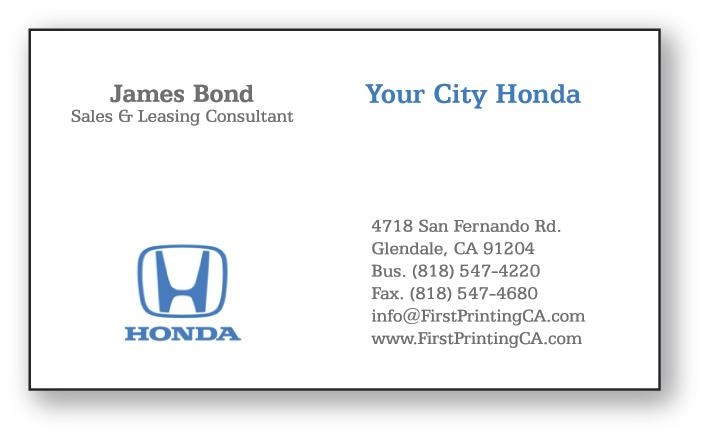

In [3]:
img_pl = PIL.Image.open('053.jpeg')

img_pl

### Extract text from image

In [4]:
text_cv = pytesseract.image_to_string(img_cv)

In [5]:
print(text_cv)

James Bond Your City Honda
Sales & Leasing Consultant

4718 San Fernando Rd.
Glendale, CA 91204
Bus. (818) 547-4220
Fax, (818) 547-4680
info@FirstPrintingCA.com
www.FirstPrintingCA.com

 



In [6]:
text_pl = pytesseract.image_to_string(img_pl)

In [8]:
print(text_pl)

James Bond Your City Honda
Sales & Leasing Consultant

4718 San Fernando Rd.
Glendale, CA 91204
Bus. (818) 547-4220
Fax. (818) 547-4680
info@FirstPrintingCA.com
www.FirstPrintingCA.com

 



In [9]:
# Image to Data

In [10]:
data = pytesseract.image_to_data(img_cv)

In [14]:
# data.split('\n')
datalist = list(map(lambda x: x.split('\t'), data.split('\n')))

In [16]:
df = pd.DataFrame(datalist[1:], columns=datalist[0])

In [18]:
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,707,437,-1,
1,2,1,1,0,0,0,72,84,509,42,-1,
2,3,1,1,1,0,0,72,84,509,42,-1,
3,4,1,1,1,1,0,110,84,471,25,-1,
4,5,1,1,1,1,1,110,84,74,19,96,James


In [20]:
df.dropna(inplace=True)

In [22]:
column_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf']

df[column_int] = df[column_int].astype(int)

In [23]:
df.dtypes

level         int64
page_num      int64
block_num     int64
par_num       int64
line_num      int64
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object

In [35]:
image = img_cv.copy()

level = 'word'

for l,x,y,w,h,c,txt in df[['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
    if level == 'page':
        if l ==1:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,0), 2)
            
        else:
            continue
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
        else:
            continue
    elif level == 'para':
        if l ==3:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
        else:
            continue
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)
        else:
            continue
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(image, txt, (x,y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0),2)
        else:
            continue

cv2.imshow("bounding box", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread (0x3736da0).
Cannot move to target thread (0x31ba9d0)

QObject::moveToThread: Current thread (0x31ba9d0) is not the object's thread